# Fashion E-Commerce Customer Analysis

## Executive Summary

This analysis examines 23,000+ customer reviews from an online women's clothing retailer to under stand purchasing patterns, customer satisfaction, and product performance across demographics

**Key Finding:**
- Tops and Dresses dominate sales (71.5% market share combined)
- Primary customer segment: 36-45 age group (31% of customers)
- Volume is not due to satisfaction: Dresses are the most purchased but Casual Bottoms are highest rated 
- Trends and Jackets department are critically underperforming (<5% combined)

**Business Impact**
Analysis reveals quality improvement opportunities for high-volume products and marketing gaps for highly-rated items, with potential to increase customer satisfaction and revenue

**Tools Used:** Python, Matplotlib, Seaborn, Statistical Analysis

## Methodology
**Data Source:** Women's E-commerce Clothing Reviews dataset (Kaggle)

**Analysis Approach:**
1. Data Cleaning: Handled missing values, removed incomplete records
2. Exploratory Data Analysis: Created customer segment by age
3. Visualization: Generated comparative charts for insights
4. Statistical Analysis: Calculated correlation and group comparisons

**Business Questions**
1. What do different age ranges order or prefer?
2. Is there a gap between volume sales and customer satisfaction?
3. How are the different department performing? What is the top department?


In [42]:
import pandas as pd

df = pd.read_excel('data/Womens Clothing E-Commerce Reviews.xlsx')

# I am Identifying how many rows and columns my data has
print(df.shape)

(23486, 11)


In [43]:
# I want to get the first 3 rows and columns
print(df.head(3))

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses  
2                        0       General         Dresses    Dresses  


In [44]:
# I am checking if my data has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [45]:
# I are getting the descriptive statistical summary
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [46]:
# I am checking for the sum of missing values in the data
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

## Exploratory Data Analysis

1. **Create Age Groups**
2. **Clean the Data**
3. **Identify the popular items by volume and ratings**
4. **Identify the rank of each department**

In [47]:
# Age range
print(f"Age range: {df['Age'].min()} to {df['Age'].max()}")

# Creating age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# Making an Age Group Distribution Table
print("\nAge Group Distribution Summary:")
age_summary = pd.DataFrame({
    'Count': df['age_group'].value_counts().sort_index(),
    'Percentage': (df['age_group'].value_counts(normalize=True).sort_index() * 100).round(1)
})
print(age_summary)

Age range: 18 to 99

Age Group Distribution Summary:
           Count  Percentage
age_group                   
18-25       1223         5.2
26-35       5753        24.5
36-45       7391        31.5
46-55       4909        20.9
55+         4210        17.9


## OBSERVATIONS

- The brand servers all ages with the lowest being 18 and highest being 99
- Most of the customers are in the 36-45 age range (31%)
- The young adults (18-25) are underrepresented(5%)
- The brand has a decent senior citizen customer base (55+) - 4000 customers
- The 26-55 age range make up 77% of the customers



In [48]:
# I am going to clean up my data
# I am dropping rows with little missing values. All three only have 14 missing values from the total dataset
df_clean = df.dropna(subset=['Division Name', 'Department Name', 'Class Name'])

# I am also dropping Title and Review columns as I am not using it for my analysis
df_clean = df_clean.drop(['Title', 'Review Text'], axis=1)

print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23472 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               23472 non-null  int64   
 1   Clothing ID              23472 non-null  int64   
 2   Age                      23472 non-null  int64   
 3   Rating                   23472 non-null  int64   
 4   Recommended IND          23472 non-null  int64   
 5   Positive Feedback Count  23472 non-null  int64   
 6   Division Name            23472 non-null  object  
 7   Department Name          23472 non-null  object  
 8   Class Name               23472 non-null  object  
 9   age_group                23472 non-null  category
dtypes: category(1), int64(6), object(3)
memory usage: 1.8+ MB
None


In [49]:
# Most Reviewed items (popularity by volume)
popular_items = df_clean['Class Name'].value_counts().head(10)
print(popular_items)
print()

# Highest rated items(popularity by satisfaction)
avg_rating_by_class = df_clean.groupby('Class Name')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_class.head(10))

Class Name
Dresses       6319
Knits         4843
Blouses       3097
Sweaters      1428
Pants         1388
Jeans         1147
Fine gauge    1100
Skirts         945
Jackets        704
Lounge         691
Name: count, dtype: int64

Class Name
Casual bottoms    4.500000
Layering          4.376712
Jeans             4.360942
Lounge            4.301013
Jackets           4.295455
Sleep             4.285088
Intimates         4.279221
Legwear           4.278788
Pants             4.265850
Fine gauge        4.260909
Name: Rating, dtype: float64


## OBSERVATIONS

- Popular item by volume is Dresses
- Popular item by satisfaction is Casual Bottoms
- Dresses sell well but aren't highest rated while Casual Bottoms have a high rating but that does not translate to sale volume 


In [50]:
# Most common departments
print('\nTop Departments:')
print(df_clean['Department Name'].value_counts())



Top Departments:
Department Name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64


## OBSERVATION

- Tops have the most orders. Tops are the best sellers of the business 

# VISUALIZATION  

I am going to create graphs and charts for my observations, publish my key findings and my recommendations

C:\Users\PC\AppData\Local\Temp\ipykernel_6560\3483152990.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dept = df_clean.groupby(['age_group', 'Department Name']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

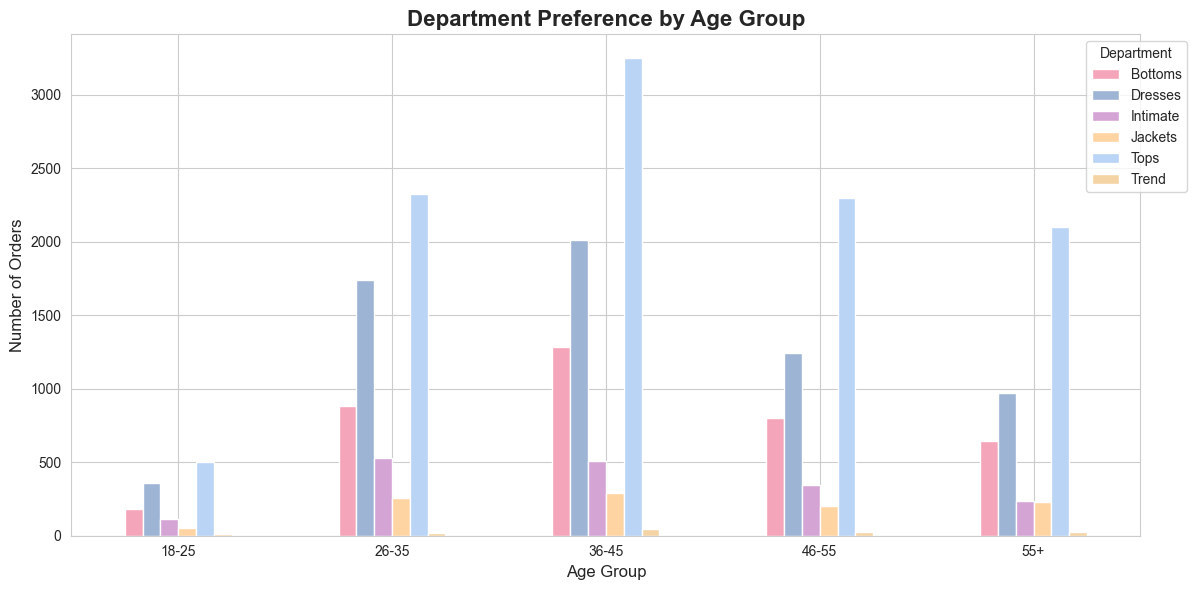

In [51]:
# What do different Age groups like?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# I am creating a count of department by age group
age_dept = df_clean.groupby(['age_group', 'Department Name']).size().unstack(fill_value=0)

colors = ['#f4a5b9', '#9db4d4', '#d4a5d4', '#ffd4a3', '#b9d4f4', '#f4d4a5']
age_dept.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors)
plt.title('Department Preference by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('images/dept_by_age.png', dpi=300, bbox_inches='tight')
plt.show()


## OBSERVATIONS

- Tops dominate across all ages. It has the universal appeal.
- Trends department is struggling especially with youngest age group (18-25) and oldest (55+).
- Jackets is underperforming across all age groups.
- Ages 36-45 is the core customer base with the most orders.
- Young adults (18-25) is small but present. Tops and Dresses is their best seller.

### Business Insights

1. **The 'Trends' Issue**
- Problem: Worst performing department, especially among the 18-25 group.
- Trendy items need to appeal to young shoppers, hence something is wrong.
- Recommendation:
    - Investigate if 'trends' is actually trendy.
    - Are prices too high for the younger customers?
    - Is it being marketed to reach the right audience?
    - The department should consider a rebranding. 

2. **Jacket Marketing**
- Problem: Low sales across all ages.
- Outwear usually sell for high profit.
- Recommendation: 
    - Investigate if it is it a seasonal issue?
    - Investigate if it is the pricing the problem?
    - Investigate if the style matches with the customer base?

3. **Who are doing it right?**
- Tops are universal and the business needs to keep the momentum and expand variety.
- Dress works for all ages. Despite the average ratings, It has high orders.
- The 35-45 age group has the highest orders and need to be prioritized.

4. **A strategy to grow the young customer base**
- They are small, but they contribute towards the sale of Dresses and Tops.
- They are not buying trendy clothes.
- The Business should consider: Social media marketing, influencer partnership, affiliate marketing, and better trend curation.
``` 

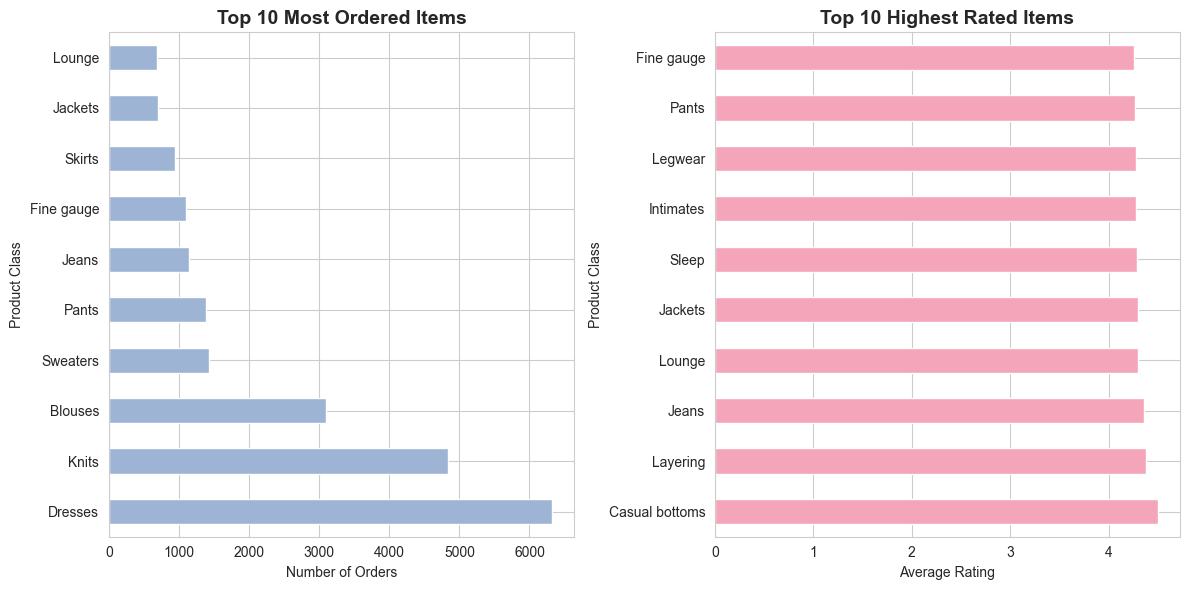

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making it pretty
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

# Top 10 most popular Item
top_items = df_clean['Class Name'].value_counts().head(10)

plt.subplot(1, 2, 1)
top_items.plot(kind='barh', color='#9db4d4')
plt.title('Top 10 Most Ordered Items',fontsize=14, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Class')

# Top 10 Highest rated Items
avg_rating = df_clean.groupby('Class Name')['Rating'].mean().sort_values(ascending=False).head(10)

plt.subplot(1, 2, 2)
avg_rating.plot(kind='barh', color='#f4a5b9')
plt.title('Top 10 Highest Rated Items', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Product Class')

plt.tight_layout()
plt.savefig('images/volume_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

## OBSERVATION

- Dresses leads in terms of sales volume while Casual Bottoms leads in terms of customer satisfaction
- Dresses are the most purchased items but, it is not in the top 10 highest rated items
- Casual Bottoms is also the highest rated item but, it is not in the top 10 most bought items
- Layering is the second highest rated item but it is not in the top 10 most ordered items
- Jeans is the third highest rated item but, it only has 1000 orders

### Business Insights

1. **Casual Bottoms and Layering Marketing**
- The company needs to find a way to boost Casual Bottoms sale through marketing as it has high ratings meaning the customers are satisfied with it
- The company needs to find a way of marketing layering as it has raving reviews but abysmal sales

2. **Dresses Issue**
- The company needs to look if there is a quality issue with dresses as it is the most purchased item but it does not have good ratings

3. **Jeans Issue**
- The company needs to investigate why jeans has a high customer satisfaction but less sales. 
    - Is it a variety issue?
    - Is pricing the problem? 


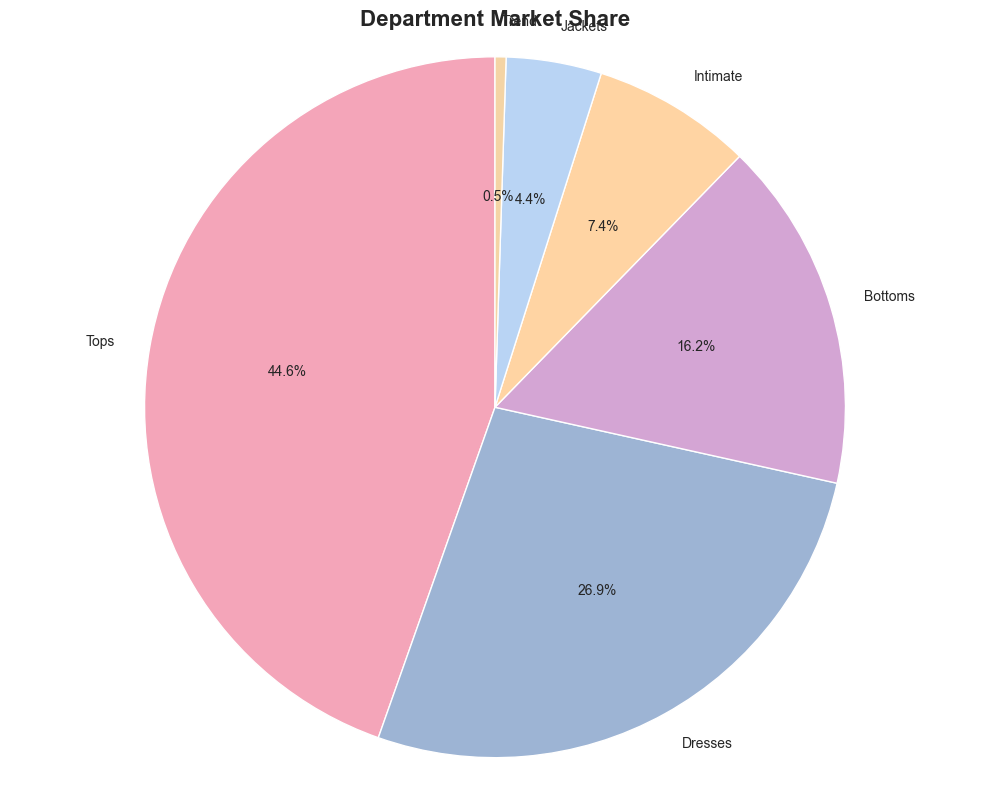

In [53]:
#  Question 3 Visualization 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

top_depts = df_clean['Department Name'].value_counts()

colors = ['#f4a5b9', '#9db4d4', '#d4a5d4', '#ffd4a3', '#b9d4f4', '#f4d4a5']
plt.pie(top_depts, labels=top_depts.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Department Market Share', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('images/market_share.png', dpi=300, bbox_inches='tight')
plt.show()

## OBSERVATION

- Tops is the top department and account for 44.6% of the business sale.
- Dresses comes in second and account for 26.9% of the business sale.
- Bottoms comes in third and accounts for 16.2% of the business sale.
- Intimate out perform jackets and trends and has a 7.4% of the business sale.
- Jackets and Trend account for 4.9% of business sale when combined.
- Tops and Dresses account for 71.5% of the business making them the top department that bring revenue to the business.

### Business Insights

1. **Top Departments**
- The company needs to make sure there is a variety of dresses and Tops as they account for 71.5% of the market share.
- Bottoms also has a significant amount of market share (16.2%). The company needs to market it as there is a growth opportunity and It can not only depend on Dresses and Tops for its revenue.
- The company needs to advertise Intimate (7.4%) as the customers do not mind buying them online. It appeals to the 26-35 and 36-45 who are our largest customer base. The adults might also have disposable income to shop for Intimates.

2. **Underperforming Departments**
- The company needs to asses if the jackets are not selling well due to a seasonal issue or style issue.
- It also needs to asses what is considered trendy among different age groups, as we can not only focus on the 18-25 group as our largest customer base is in the 36-45 age group and need to be considerate of them.
```


## Statistical Analysis

Now that I am done with Visualization, I will do some statistical analysis to validate my findings


In [54]:
# 1. Correlation between age and rating
correlation = df_clean['Age'].corr(df_clean['Rating'])
print(f"Correlation between Age and Rating: {correlation:.3f}")

# 2. Average rating by department
dept_ratings = df_clean.groupby('Department Name')['Rating'].agg(['mean', 'count', 'std'])
print("\nRatings by Department:")
print(dept_ratings.sort_values('mean', ascending=False))

# 3. Recommendation rate by age group
rec_by_age = df_clean.groupby('age_group')['Recommended IND'].mean() * 100
print("\nRecommendation Rate by Age Group:")
print(rec_by_age)

Correlation between Age and Rating: 0.027

Ratings by Department:
                     mean  count       std
Department Name                           
Bottoms          4.288760   3799  1.055619
Intimate         4.280115   1735  1.074466
Jackets          4.264535   1032  1.136120
Tops             4.172239  10468  1.117893
Dresses          4.150815   6319  1.124371
Trend            3.815126    119  1.333826

Recommendation Rate by Age Group:
age_group
18-25    85.094185
26-35    79.881760
36-45    82.060655
46-55    82.137031
55+      84.988124
Name: Recommended IND, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_6560\361220687.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rec_by_age = df_clean.groupby('age_group')['Recommended IND'].mean() * 100


## OBSERVATIONS

**1. Age vs Rating Correlation: 0.027 (Weak/None)**
- Age has almost no relationship with satisfaction ratings
- A customer's age does not predict their satisfaction level

**Key Insight**: Product quality matters more than demographic targeting for satisfaction

**2. Department Ratings:**
- **Bottoms**: 4.2 average (highest satisfaction, 3,799 orders)
- **Intimate**: 4.2 average(second highest satisfaction, 1,735 orders)
- **Jacket**:4.2 average(third highest satisfaction, 1,032 orders)
- **Tops**: 4.1 average (strong satisfaction, 10,468 orders - largest order volume)
- **dresses**: 4.1 average(strong satisfaction, 6,319 order - second largest order volume)
- **Trends**: 3.8 average (lowest rated, below 4.0 rating)

**Key Insight**: Tops and dresses dominate in volume with excellent ratings, while bottoms, jackets, and intimates have the highest satisfaction but significantly fewer orders suggesting a marketing opportunity. Trends department is struggling with it being the only department below the 4.0 rating which shows it needs urgent fixing

**3. Recommendation Rate by Age Group:**
- 18-25: 85.09% (highest, despite being the smallest customer base)
- 55+: 84.99%
- 46-55: 82.13%
- 36-45: 82.06%(our largest customer base)
- 26-35: 79.88%(lowest, despite having a large customer base)

**Key Insight**: The youngest customers (18-25) are the most likely to recommend despite being the smallest customer base, while the 26-35 group shows a satisfaction gap worth investigating
```


## Business Recommendations Based on Statistics

1. **Investigate 26-35 dissatisfaction** - Survey this group and understand why they are less likely to recommend
2. **Leverage the young advocate** - Create referral/ affiliate marketing program targeting 18-25 who love the brand
3. **Promote Bottoms more** - It has the highest satisfaction(4.2) but low orders suggesting a marketing opportunity
4. **Fix the Trend department urgently** - It is the only department below the 4.0, and consistent underperformance 
5. **Maintain Tops excellence** - It has a 4.1 rating with massive orders over all departments




## Summary of Analytical Findings

This analysis of 23,000+ customer reviews revealed:

1. **Customer Demographics**: 36-45 age group represents 31% of customers, but youngest customers (18-25) shows highest satisfaction
2. **Product Performance**: Tops dominate sales (44.6% market share) while Bottoms lead in satisfaction (4.2 ratings)
3. **Department Gaps**: Trend department critically underperforms (3.8 ratings, 0.5 market share)
4. **Satisfaction Paradox**: Smallest customer segment (18-25) most likely to recommend; largest working age group(26-35) least likely 

**Immediate Actions:**

1. **Investigate Dress Quality**: Most ordered but not in top-rated items, suggests fit or quality issues
2. **Market Casual Bottoms**: Highest customer satisfaction but, low sales volume indicating a marketing opportunity
3. **Re-evaluate Trends Department**: 0.5% market share is critical; consider rebranding or discontinuation

**Growth Opportunities:**
1. **Target 18-25 Segment**: Smallest customer base (5%) represent untapped market
2. **Optimize for Core Demographic**: 36-45 age group drives business; prioritize their preferences
3. **Promote Hidden Gems**: Layering items have high ratings but low awareness

**Expected Impact:**
- Improved customer satisfaction through quality enhancement
- Increased revenue from better marketing of high-rated items
- More efficient inventory allocation based on demand patterns

```

## Conclusion

This analysis successfully identified key customer segments, product performance gaps, and actionable business opportunities within the fashion e-commerce dataset.

The most significant finding is the disconnect between sales volume and customer satisfaction - revealing that what sells most is not always what customers love most. This presents clear opportunities for both quality improvement and strategic marketing.

the 36-45 age demographic's dominance (31% of customers) across all product categories suggests the brand has successfully positioned itself for this segment but, has room to grow in adjacent demographics

**Next Steps:**
- Deep dive into text analysis to understand specific quality concerns
- Customer lifetime value analysis by age group
